- In this notebook, we do vesicle detection on microscopy images
- Then construct the data set for modeling
- We have run the microscopy analysis by seperating the images to 2 batch. Because the image are 4096x4096, which require much memory to run.
<!-- What did we do? Why are we doing it?  What are the unique aspects of this batch of data?
 -->

In [ ]:
# Add the src directory to sys.path
import sys
sys.path.append(os.path.abspath('../src'))

In [2]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

from utils import *
from batch_run import run_batch_files_templates
import argparse
import pandas as pd
import time
import shutil
import re

### Microscopy data processing

In [2]:
# Loading template
template1 = np.load('../Templates/template_656, 640, 71, 71.npy')
template2 = np.load('../Templates/Project_Whole Plate1_1024x1024_200Hz_1%Laser_800gain_B_5_R1.tif_enhance_482_20_56_56.npy')
template3 = np.load('../Templates/1024x1024 - 4 point_no-z-stack - split 5 rows rows only_TileScan 1_C_11_R2.npy')

In [3]:
templates = [template1, template2, template3]

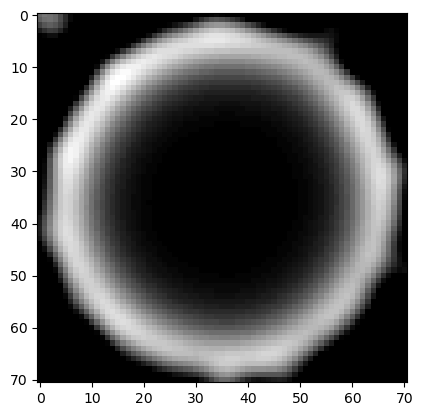

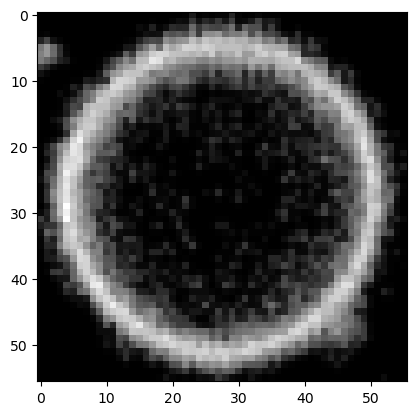

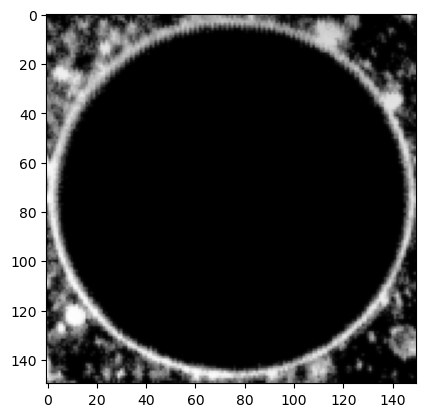

In [4]:
for template in templates:
    plt.imshow(template, cmap='gray')
    plt.show()

In [11]:
file_folder= '../../data/20240419/OriginalImage/04-19-2024'
PlateName='Plate_20240423'
# Create the folder if it doesn't exist
folder_path = f"Results_{PlateName}"
os.makedirs(folder_path, exist_ok=True)

import time
start_time = time.time()
# file_template = load_template(template)
run_batch_files_templates(file_folder, templates, PlateName, \
                min_scale=0.3, max_scale=4, intervals=100, threshold = 0.5)


end_time = time.time()
running_time = end_time - start_time

print("Script execution time:", running_time, "seconds")

None vesicles found
Project_TileScan 16_G_15.tif
10 vesicles found
Project_TileScan 17_G_15.tif
24 vesicles found
Project_TileScan 4_H_8.tif
None vesicles found
Project_TileScan 21_C_20.tif
27 vesicles found
Project_TileScan 7_C_15.tif
13 vesicles found
Project_TileScan 21_D_15.tif
33 vesicles found
Project_TileScan 5_L_9.tif
6 vesicles found
Project_TileScan 1_E_11.tif
None vesicles found
Project_TileScan 18_G_20.tif


KeyboardInterrupt: 

In [22]:
file_folder= '../../data/20240419/OriginalImage/04-19-2024'
files = os.listdir(file_folder)
files

['Project_TileScan 16_G_15.tif',
 'Project_TileScan 17_G_15.tif',
 'Project_TileScan 4_H_8.tif',
 'Project_TileScan 21_C_20.tif',
 'Project_TileScan 7_C_15.tif',
 'Project_TileScan 21_D_15.tif',
 'Project_TileScan 5_L_9.tif',
 'Project_TileScan 1_E_11.tif',
 'Project_TileScan 18_G_20.tif',
 'Project_TileScan 33_J_20.tif',
 'Project_TileScan 1_D_8.tif',
 'Project_TileScan 3-Low Expo_C_8.tif',
 'Project_TileScan 9_D_15.tif',
 'Project_TileScan 8_C_20.tif',
 'Project_TileScan 2_E_8.tif',
 'Project_TileScan 28_G_14.tif',
 'Project_TileScan 28_G_15.tif',
 'Project_TileScan 2_E_9.tif',
 'Project_TileScan 8_C_21.tif',
 'Project_TileScan 9_D_14.tif',
 'Project_TileScan 3-Low Expo_C_9.tif',
 'Project_TileScan 8_D_14.tif',
 'Project_TileScan 1_D_9.tif',
 'Project_TileScan 2_F_12.tif',
 'Project_TileScan 33_J_21.tif',
 'Project_TileScan 18_G_21.tif',
 'Project_TileScan 19_G_21.tif',
 'Project_TileScan 1_E_10.tif',
 'Project_TileScan 5_L_8.tif',
 'Project_TileScan 3_K_3.tif',
 'Project_TileScan 22

In [23]:
len(files)

514

In [24]:
file_folder2 = '../../data/20240419/VesicleDetection/Results_Plate_20240423'
# List all files in the folder
files2 = os.listdir(file_folder2)

# Filter out only CSV files
csv_files = [file for file in files2 if file.endswith('.csv')]
csv_files

['Project_TileScan 27_F_17.tif.csv',
 'Project_TileScan 38_K_15.tif.csv',
 'Project_TileScan 21_C_21.tif.csv',
 'Project_TileScan 3-Low Expo_F_12.tif.csv',
 'Project_TileScan 32_I_14.tif.csv',
 'Project_TileScan 3_K_4.tif.csv',
 'Project_TileScan 4_H_10.tif.csv',
 'Project_TileScan 9_D_14.tif.csv',
 'Project_TileScan 33_K_16.tif.csv',
 'Project_TileScan 21_D_15.tif.csv',
 'Project_TileScan 16_F_21.tif.csv',
 'Project_TileScan 3_H_10.tif.csv',
 'Project_TileScan 1_C_5.tif.csv',
 'Project_TileScan 2_G_8.tif.csv',
 'Project_TileScan 26_F_20.tif.csv',
 'Project_TileScan 3-Low Expo_G_9.tif.csv',
 'Project_TileScan 30_H_21.tif.csv',
 'Project_TileScan 28_G_16.tif.csv',
 'Project_TileScan 25_E_17.tif.csv',
 'Project_TileScan 1_G_3.tif.csv',
 'Project_TileScan 1_F_9.tif.csv',
 'Project_TileScan 24_D_19.tif.csv',
 'Project_TileScan 3_L_6.tif.csv',
 'Project_TileScan 3_I_3.tif.csv',
 'Project_TileScan 31_H_20.tif.csv',
 'Project_TileScan 25_E_21.tif.csv',
 'Project_TileScan 2_G_12.tif.csv',
 'Pr

In [25]:
len(csv_files)

327

In [31]:
csv_files_no_extension = [filename.replace('.csv', '') for filename in csv_files]
csv_files_no_extension

['Project_TileScan 27_F_17.tif',
 'Project_TileScan 38_K_15.tif',
 'Project_TileScan 21_C_21.tif',
 'Project_TileScan 3-Low Expo_F_12.tif',
 'Project_TileScan 32_I_14.tif',
 'Project_TileScan 3_K_4.tif',
 'Project_TileScan 4_H_10.tif',
 'Project_TileScan 9_D_14.tif',
 'Project_TileScan 33_K_16.tif',
 'Project_TileScan 21_D_15.tif',
 'Project_TileScan 16_F_21.tif',
 'Project_TileScan 3_H_10.tif',
 'Project_TileScan 1_C_5.tif',
 'Project_TileScan 2_G_8.tif',
 'Project_TileScan 26_F_20.tif',
 'Project_TileScan 3-Low Expo_G_9.tif',
 'Project_TileScan 30_H_21.tif',
 'Project_TileScan 28_G_16.tif',
 'Project_TileScan 25_E_17.tif',
 'Project_TileScan 1_G_3.tif',
 'Project_TileScan 1_F_9.tif',
 'Project_TileScan 24_D_19.tif',
 'Project_TileScan 3_L_6.tif',
 'Project_TileScan 3_I_3.tif',
 'Project_TileScan 31_H_20.tif',
 'Project_TileScan 25_E_21.tif',
 'Project_TileScan 2_G_12.tif',
 'Project_TileScan 3_H_9.tif',
 'Project_TileScan 10_E_13.tif',
 'Project_TileScan 3_J_7.tif',
 'Project_TileSca

In [33]:
# Specify folder paths
folder1 = '../../data/20240419/OriginalImage/04-19-2024'
folder2 = '../../data/20240419/VesicleDetection/Results_Plate_20240423'
folder3 = '../../data/20240419/OriginalImage/04-19-2024_1'

In [34]:
# Copy files from folder1 to folder3 if they don't exist in folder2
for file in files:
    if file not in csv_files_no_extension:
        # print(file)
        src = os.path.join(folder1, file)
        dst = os.path.join(folder3, file)
        print(dst)
        shutil.copyfile(src, dst)
        
print("Files copied successfully.")

/Users/haoliu/Documents/Hao/Fordham/Microscopy/Data/04-19-2024_1/Project_TileScan 27_F_18.tif
/Users/haoliu/Documents/Hao/Fordham/Microscopy/Data/04-19-2024_1/Project_TileScan 4_K_7.tif
/Users/haoliu/Documents/Hao/Fordham/Microscopy/Data/04-19-2024_1/Project_TileScan 26_F_18.tif
/Users/haoliu/Documents/Hao/Fordham/Microscopy/Data/04-19-2024_1/Project_TileScan 1_F_11.tif
/Users/haoliu/Documents/Hao/Fordham/Microscopy/Data/04-19-2024_1/Project_TileScan 37_I_16.tif
/Users/haoliu/Documents/Hao/Fordham/Microscopy/Data/04-19-2024_1/Project_TileScan 1_C_3.tif
/Users/haoliu/Documents/Hao/Fordham/Microscopy/Data/04-19-2024_1/Project_TileScan 38_L_13.tif
/Users/haoliu/Documents/Hao/Fordham/Microscopy/Data/04-19-2024_1/Project_TileScan 4_I_5.tif
/Users/haoliu/Documents/Hao/Fordham/Microscopy/Data/04-19-2024_1/Project_TileScan 10_E_18.tif
/Users/haoliu/Documents/Hao/Fordham/Microscopy/Data/04-19-2024_1/Project_TileScan 3_L_9.tif
/Users/haoliu/Documents/Hao/Fordham/Microscopy/Data/04-19-2024_1/Proj

In [29]:
514-327

187

In [35]:
# Now run for the rest 187 files

In [5]:
file_folder= '../../data/20240419/OriginalImage/04-19-2024_1'
PlateName='Plate_20240423_1'
# Create the folder if it doesn't exist
folder_path = f"Results_{PlateName}"
os.makedirs(folder_path, exist_ok=True)
# Record the start time
import time
start_time = time.time()
# file_template = load_template(template)
run_batch_files_templates(file_folder, templates, PlateName, \
                min_scale=0.3, max_scale=4, intervals=100, threshold = 0.5)

# Record the end time
end_time = time.time()

# Calculate the running time
running_time = end_time - start_time

print("Script execution time:", running_time, "seconds")

18 vesicles found
Project_TileScan 27_F_18.tif
6 vesicles found
Project_TileScan 4_K_7.tif
11 vesicles found
Project_TileScan 26_F_18.tif
4 vesicles found
Project_TileScan 1_F_11.tif
None vesicles found
Project_TileScan 37_I_16.tif
7 vesicles found
Project_TileScan 1_C_3.tif
None vesicles found
Project_TileScan 38_L_13.tif
26 vesicles found
Project_TileScan 4_I_5.tif
None vesicles found
Project_TileScan 10_E_18.tif
None vesicles found
Project_TileScan 3_L_9.tif
30 vesicles found
Project_TileScan 33_I_20.tif
3 vesicles found
Project_TileScan 2_F_7.tif
35 vesicles found
Project_TileScan 29_H_14.tif
5 vesicles found
Project_TileScan 1_G_7.tif
9 vesicles found
Project_TileScan 33_K_19.tif
28 vesicles found
Project_TileScan 2_D_5.tif
13 vesicles found
Project_TileScan 1_E_5.tif
4 vesicles found
Project_TileScan 3-Low Expo_C_11.tif
1 vesicles found
Project_TileScan 1_E_7.tif
14 vesicles found
Project_TileScan 2_D_7.tif
15 vesicles found
Project_TileScan 30_H_19.tif
10 vesicles found
Project_

In [7]:
def calculate_statistic(folder_path):

    # Initialize an empty list to store DataFrames
    dfs = []
    
    # Iterate through all CSV files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".csv"):
            # Read the CSV file into a DataFrame
            df = pd.read_csv(os.path.join(folder_path, filename), header=0)
            
            # Calculate the area for each object
            if 'box_length' in df.columns:
                df['area'] = np.pi * (df['box_length'] / 2)**2
            
            # Count the number of rows
            num_rows = len(df)
            
            # Sum up the areas to get the total area for the file
            total_area = df['area'].sum()
            
            # Calculate the area percent
            area_percent = total_area / (1024 * 1024)
            
            # Create a DataFrame containing filename, total area, number of rows, and area percent
            area_df = pd.DataFrame({
                'filename': [filename],
                'num_vesicles': [num_rows],
                'area_vesicles': [total_area],  
                'area_percent': [area_percent]
            })
            
            # Append the DataFrame to the list
            dfs.append(area_df)
    
    # Concatenate all DataFrames in the list into a single DataFrame
    area_df = pd.concat(dfs, ignore_index=True)
    return area_df

In [12]:
folder_path='../../data/20240419/VesicleDetection/Results_Plate_20230423_csv'
area_df=calculate_statistic(folder_path)
area_df

,filename,num_vesicles,area_vesicles,area_percent
0,Project_TileScan 27_F_17.tif.csv,14,114291.140738,0.108997
1,Project_TileScan 38_K_15.tif.csv,11,38108.304286,0.036343
2,Project_TileScan 21_C_21.tif.csv,43,243505.631978,0.232225
3,Project_TileScan 38_I_20.tif.csv,7,71273.312532,0.067972
4,Project_TileScan 3-Low Expo_F_12.tif.csv,0,0.000000,0.000000
...,...,...,...,...
509,Project_TileScan 4_L_6.tif.csv,1,16060.607043,0.015317
510,Project_TileScan 14_F_17.tif.csv,21,132030.929054,0.125915
511,Project_TileScan 7_C_15.tif.csv,27,420806.911170,0.401313
512,Project_TileScan 2_E_3.tif.csv,22,684371.612241,0.652668


In [68]:
area_df.to_csv('area_df_20240425.csv', index=False)

In [1]:
import pandas as pd
area_df = pd.read_csv('area_df_20240425.csv')
area_df

,filename,num_vesicles,area_vesicles,area_percent
0,Project_TileScan 27_F_17.tif.csv,14,114291.14070,0.108997
1,Project_TileScan 38_K_15.tif.csv,11,38108.30429,0.036343
2,Project_TileScan 21_C_21.tif.csv,43,243505.63200,0.232225
3,Project_TileScan 38_I_20.tif.csv,7,71273.31253,0.067972
4,Project_TileScan 3-Low Expo_F_12.tif.csv,0,0.00000,0.000000
...,...,...,...,...
509,Project_TileScan 4_L_6.tif.csv,1,16060.60704,0.015317
510,Project_TileScan 14_F_17.tif.csv,21,132030.92910,0.125915
511,Project_TileScan 7_C_15.tif.csv,27,420806.91120,0.401313
512,Project_TileScan 2_E_3.tif.csv,22,684371.61220,0.652668


In [2]:
area_df.to_csv('Plate_20240425_VesiclesSummary.csv', index=False)

In [87]:
len(area_df[area_df['num_vesicles']>0])/len(area_df)

0.7801556420233463

In [62]:
# remove some special str
df=area_df.copy()
df['filename'] = df['filename'].str.replace('_z[0-9]', '', regex=True)

In [63]:
# Define a function to extract the desired part from the filename
def extract_part(filename):
    parts = filename.split('_')
    return ''.join(parts[-2:])

# Apply the function to the entire column
df['filename'] = df['filename'].apply(extract_part)
# df['filename'] = df['filename'].str.replace('.tif.csv', '')
# df
df

,filename,num_vesicles,area_vesicles,area_percent
0,F17.tif.csv,14,114291.140738,0.108997
1,K15.tif.csv,11,38108.304286,0.036343
2,C21.tif.csv,43,243505.631978,0.232225
3,I20.tif.csv,7,71273.312532,0.067972
4,F12.tif.csv,0,0.000000,0.000000
...,...,...,...,...
509,L6.tif.csv,1,16060.607043,0.015317
510,F17.tif.csv,21,132030.929054,0.125915
511,C15.tif.csv,27,420806.911170,0.401313
512,E3.tif.csv,22,684371.612241,0.652668


In [64]:
sorted_df = df.sort_values(by='filename')
sorted_df

,filename,num_vesicles,area_vesicles,area_percent
460,C10.tif.csv,0,0.000000,0.000000
186,C10.tif.csv,71,323376.698205,0.308396
99,C10.tif.csv,0,0.000000,0.000000
215,C11.tif.csv,4,19263.460754,0.018371
60,C11.tif.csv,6,3806.824898,0.003630
...,...,...,...,...
286,L8.tif.csv,2,70890.038228,0.067606
421,L8.tif.csv,17,324668.678183,0.309628
378,L9.tif.csv,0,0.000000,0.000000
142,L9.tif.csv,1,2922.466566,0.002787


In [65]:
sorted_df = sorted_df.groupby('filename').apply(lambda x: x.loc[x['num_vesicles'].idxmax()]).reset_index(drop=True)
sorted_df

,filename,num_vesicles,area_vesicles,area_percent
0,C10.tif.csv,71,323376.698205,0.308396
1,C11.tif.csv,11,66101.465626,0.063039
2,C12.tif.csv,53,209927.504298,0.200202
3,C13.tif.csv,16,229871.119861,0.219222
4,C14.tif.csv,51,192696.653991,0.183770
...,...,...,...,...
188,L5.tif.csv,0,0.000000,0.000000
189,L6.tif.csv,5,42342.385785,0.040381
190,L7.tif.csv,5,7160.475056,0.006829
191,L8.tif.csv,17,324668.678183,0.309628


In [66]:
# Define a custom sorting function
def custom_sort(filename):
    match = re.search(r'([A-L])(\d+)', filename)
    char = match.group(1)
    num = int(match.group(2))
    return ord(char), num

# Sort based on the custom sorting function
sorted_df['sort_key'] = sorted_df['filename'].apply(custom_sort)
sorted_df = sorted_df.sort_values(by='sort_key').reset_index(drop=True)

# Drop the sort_key column as it's no longer needed
sorted_df.drop(columns=['sort_key'], inplace=True)
sorted_df

,filename,num_vesicles,area_vesicles,area_percent
0,C3.tif.csv,24,179187.805581,0.170887
1,C4.tif.csv,9,89701.109640,0.085546
2,C5.tif.csv,8,100677.834371,0.096014
3,C6.tif.csv,15,5509.568116,0.005254
4,C7.tif.csv,44,629219.382411,0.600070
...,...,...,...,...
188,L11.tif.csv,12,158096.723301,0.150773
189,L12.tif.csv,6,10867.554387,0.010364
190,L13.tif.csv,7,69472.394543,0.066254
191,L14.tif.csv,9,78736.165881,0.075089


In [67]:
sorted_df.to_csv('sorted_df_20240425.csv', index=False)

In [95]:
sorted_df = pd.read_csv('sorted_df_20240425.csv')

In [96]:
sorted_df[sorted_df['filename']=='J13.tif.csv']

,filename,num_vesicles,area_vesicles,area_percent
150,J13.tif.csv,0,0.0,0.0


In [97]:
# Remove the empty cell
sorted_df = sorted_df[sorted_df['filename'] != 'J13.tif.csv'].reset_index(drop=True)
sorted_df

,filename,num_vesicles,area_vesicles,area_percent
0,C3.tif.csv,24,179187.805581,0.170887
1,C4.tif.csv,9,89701.109640,0.085546
2,C5.tif.csv,8,100677.834371,0.096014
3,C6.tif.csv,15,5509.568116,0.005254
4,C7.tif.csv,44,629219.382411,0.600070
...,...,...,...,...
187,L11.tif.csv,12,158096.723301,0.150773
188,L12.tif.csv,6,10867.554387,0.010364
189,L13.tif.csv,7,69472.394543,0.066254
190,L14.tif.csv,9,78736.165881,0.075089


In [77]:
len(sorted_df[sorted_df['num_vesicles']>0])/len(sorted_df)

0.9533678756476683

In [90]:
sorted_df[sorted_df['num_vesicles']<=0]

,filename,num_vesicles,area_vesicles,area_percent,group
17,C20.tif.csv,0,0.0,0.0,1
39,D22.tif.csv,0,0.0,0.0,1
81,G4.tif.csv,0,0.0,0.0,2
120,I3.tif.csv,0,0.0,0.0,3
142,J5.tif.csv,0,0.0,0.0,3
147,J10.tif.csv,0,0.0,0.0,4
161,K5.tif.csv,0,0.0,0.0,4
181,L5.tif.csv,0,0.0,0.0,4


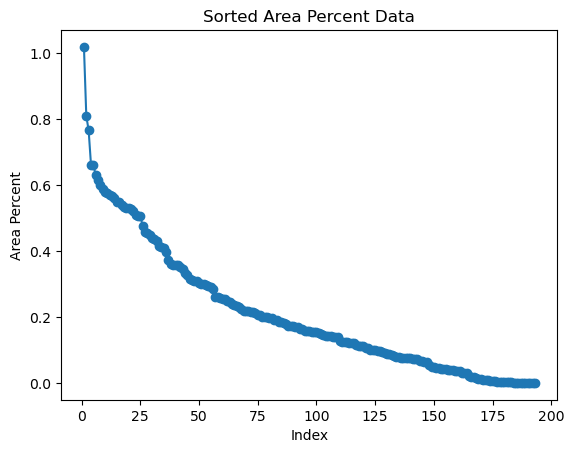

In [70]:
# Sort the DataFrame based on the "area_percent" column
df_sorted = sorted_df.sort_values(by="area_percent", ascending=False)

# Plot the sorted data
plt.plot(range(1, len(df_sorted) + 1),df_sorted["area_percent"], marker='o')
plt.xlabel("Index")
plt.ylabel("Area Percent")
plt.title("Sorted Area Percent Data")
plt.show()

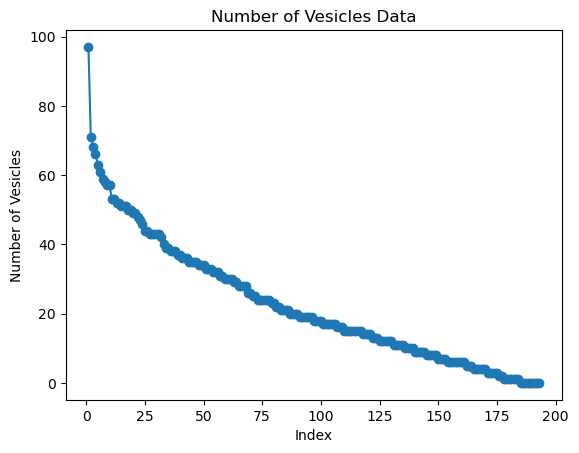

In [72]:
# Sort the DataFrame based on the "area_percent" column
df_sorted = sorted_df.sort_values(by="num_vesicles", ascending=False)

# Plot the sorted data
plt.plot(range(1, len(df_sorted) + 1),df_sorted["num_vesicles"], marker='o')
plt.xlabel("Index")
plt.ylabel("Number of Vesicles")
plt.title("Number of Vesicles Data")
plt.show()

/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/haoliu/anaconda3/envs/ActiveLearning/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

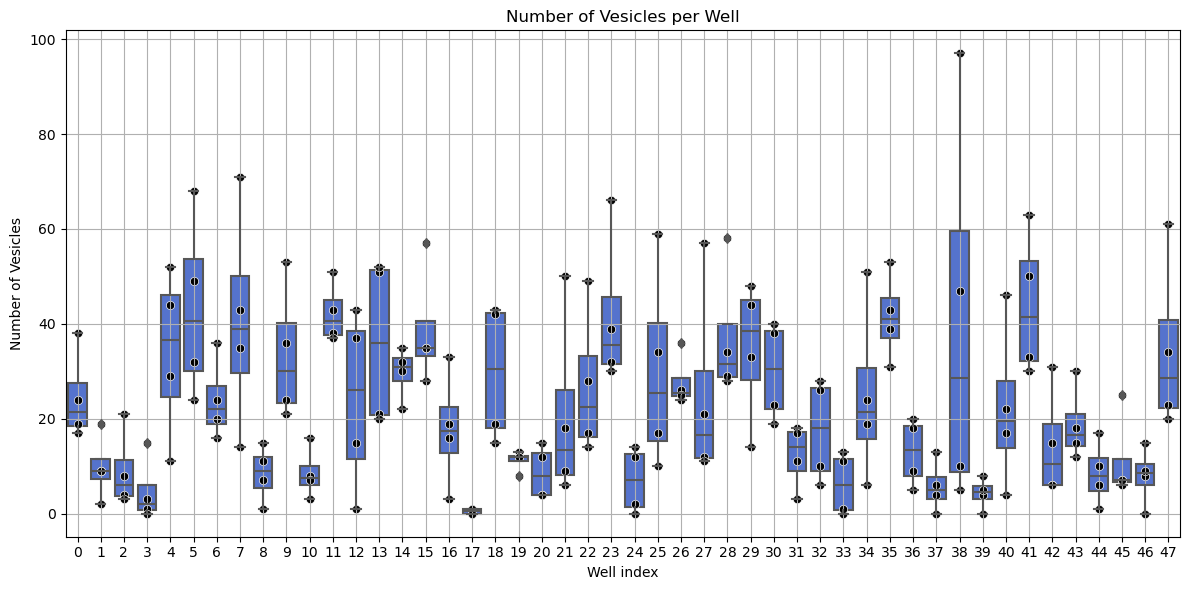

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and axis
color = 'royalblue'
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x=sorted_df.index % 48 , y='num_vesicles', data=sorted_df, color=color)
sns.scatterplot(x=sorted_df.index % 48 , y='num_vesicles', data=sorted_df, color='black', ax=ax)

# Set labels and title
ax.set_xlabel('Well index')
ax.set_ylabel('Number of Vesicles')
ax.set_title('Number of Vesicles per Well')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

- Constructing data set 

In [103]:
sorted_df

,filename,num_vesicles,area_vesicles,area_percent
0,C3.tif.csv,24,179187.805581,0.170887
1,C4.tif.csv,9,89701.109640,0.085546
2,C5.tif.csv,8,100677.834371,0.096014
3,C6.tif.csv,15,5509.568116,0.005254
4,C7.tif.csv,44,629219.382411,0.600070
...,...,...,...,...
187,L11.tif.csv,12,158096.723301,0.150773
188,L12.tif.csv,6,10867.554387,0.010364
189,L13.tif.csv,7,69472.394543,0.066254
190,L14.tif.csv,9,78736.165881,0.075089


In [107]:
sorted_df.to_csv('sorted_df_20240428.csv', index=False)

In [122]:
# Calculate the number of rows in each dataframe
num_rows_per_df = 48

# Split the sorted_df into four dataframes
df1 = sorted_df.iloc[:num_rows_per_df].reset_index(drop=True)
df2 = sorted_df.iloc[num_rows_per_df:num_rows_per_df*2].reset_index(drop=True)
df3 = sorted_df.iloc[num_rows_per_df*2:num_rows_per_df*3].reset_index(drop=True)
df4 = sorted_df.iloc[num_rows_per_df*3:].reset_index(drop=True)

In [130]:
# Concatenate the four dataframes vertically
concatenated_df = pd.concat([df1, df2, df3, df4])
# Exclude non-numeric columns from the calculation
numeric_df = concatenated_df.select_dtypes(include=np.number)

# Calculate the median values along the rows
median_values = numeric_df.groupby(numeric_df.index % num_rows_per_df).median()

# Print the median values
median_values

,num_vesicles,area_vesicles,area_percent
0,21.5,362985.505682,0.346170
1,9.0,60223.938470,0.057434
2,6.0,54847.495343,0.052307
3,2.0,4963.716393,0.004734
4,36.5,715620.248969,0.682469
5,40.5,516263.418552,0.492347
6,22.0,154523.554357,0.147365
7,39.0,238177.098138,0.227143
8,9.0,51964.691384,0.049557
9,30.0,210243.627059,0.200504


In [3]:
dispense_df_send = pd.read_csv('dispense_df_20240415.csv')
dispense_df_send

,decanoic acid (mM) (50 mM),decanoic acid (mM) (10 mM),decanoic acid (mM) (2 mM),decanoate (mM) (50 mM),decanoate (mM) (10 mM),decanoate (mM) (2 mM),decylamine (mM) (50 mM),decylamine (mM) (10 mM),decylamine (mM) (2 mM),decyl trimethylamine (mM) (50 mM),decyl trimethylamine (mM) (10 mM),decyl trimethylamine (mM) (2 mM),decylsulfate (mM) (50 mM),decylsulfate (mM) (10 mM),decylsulfate (mM) (2 mM),decanol (mM) (15 mM),decanol (mM) (3 mM),monocaprin (mM) (10 mM),monocaprin (mM) (2 mM)
0,0.0,17.0,0.0,6.4,0.0,0.0,9.7,0.0,0.0,14.9,0.0,0.0,17.4,0.0,0.0,7.4,0.0,15.7,0.0
1,13.7,0.0,0.0,0.0,18.1,0.0,0.0,0.0,19.2,7.5,0.0,0.0,9.5,0.0,0.0,0.0,15.4,0.0,11.3
2,8.8,0.0,0.0,4.1,0.0,0.0,10.6,0.0,0.0,19.9,0.0,0.0,17.0,0.0,0.0,0.0,11.5,4.5,0.0
3,14.5,0.0,0.0,19.9,0.0,0.0,0.0,9.3,0.0,0.0,0.0,7.4,13.5,0.0,0.0,10.7,0.0,0.0,12.0
4,8.9,0.0,0.0,12.9,0.0,0.0,17.4,0.0,0.0,5.7,0.0,0.0,7.0,0.0,0.0,14.9,0.0,7.0,0.0
5,0.0,8.9,0.0,16.0,0.0,0.0,13.3,0.0,0.0,18.3,0.0,0.0,15.7,0.0,0.0,11.7,0.0,0.0,17.2
6,17.7,0.0,0.0,19.3,0.0,0.0,13.2,0.0,0.0,7.2,0.0,0.0,0.0,16.5,0.0,7.2,0.0,16.9,0.0
7,15.6,0.0,0.0,15.6,0.0,0.0,0.0,15.0,0.0,18.9,0.0,0.0,18.5,0.0,0.0,0.0,19.8,5.3,0.0
8,0.0,16.4,0.0,0.0,6.2,0.0,0.0,11.4,0.0,0.0,0.0,8.5,14.7,0.0,0.0,16.7,0.0,10.4,0.0
9,0.0,8.2,0.0,11.7,0.0,0.0,0.0,18.9,0.0,9.7,0.0,0.0,19.7,0.0,0.0,0.0,9.1,7.5,0.0


In [149]:
dispense_df_send.columns

Index(['decanoic acid (mM) (50 mM)', 'decanoic acid (mM) (10 mM)',
       'decanoic acid (mM) (2 mM)', 'decanoate (mM) (50 mM)',
       'decanoate (mM) (10 mM)', 'decanoate (mM) (2 mM)',
       'decylamine (mM) (50 mM)', 'decylamine (mM) (10 mM)',
       'decylamine (mM) (2 mM)', 'decyl trimethylamine (mM) (50 mM)',
       'decyl trimethylamine (mM) (10 mM)', 'decyl trimethylamine (mM) (2 mM)',
       'decylsulfate (mM) (50 mM)', 'decylsulfate (mM) (10 mM)',
       'decylsulfate (mM) (2 mM)', 'decanol (mM) (15 mM)',
       'decanol (mM) (3 mM)', 'monocaprin (mM) (10 mM)',
       'monocaprin (mM) (2 mM)'],
      dtype='object')

In [4]:
# List of solutes you want to extract
solutes = ['decanoic acid', 'decanoate', 'decylamine', 'decyl trimethylamine', 'decylsulfate', 'decanol', 'monocaprin']

# Create a new DataFrame to store the results
result_df = pd.DataFrame()

for solute in solutes:
    solute_columns = [col for col in dispense_df_send.columns if solute in col]
    concentrations = [float(re.search(r'\d+', col).group()) for col in solute_columns]
    total_mass_column = 'Total_' + solute + '_Mass'
    result_df[total_mass_column] = (dispense_df_send[solute_columns] * concentrations).sum(axis=1)

# Display the new DataFrame with the added columns
# Divide all column values by 200
result_df = result_df.div(200)
result_df

,Total_decanoic acid_Mass,Total_decanoate_Mass,Total_decylamine_Mass,Total_decyl trimethylamine_Mass,Total_decylsulfate_Mass,Total_decanol_Mass,Total_monocaprin_Mass
0,0.850,1.600,2.425,3.725,4.350,0.5550,0.785
1,3.425,0.905,0.192,1.875,2.375,0.2310,0.113
2,2.200,1.025,2.650,4.975,4.250,0.1725,0.225
3,3.625,4.975,0.465,0.074,3.375,0.8025,0.120
4,2.225,3.225,4.350,1.425,1.750,1.1175,0.350
5,0.445,4.000,3.325,4.575,3.925,0.8775,0.172
6,4.425,4.825,3.300,1.800,0.825,0.5400,0.845
7,3.900,3.900,0.750,4.725,4.625,0.2970,0.265
8,0.820,0.310,0.570,0.085,3.675,1.2525,0.520
9,0.410,2.925,0.945,2.425,4.925,0.1365,0.375


In [151]:
df_combine = pd.concat([result_df, median_values], axis=1)
df_combine

,Total_decanoic acid_Mass,Total_decanoate_Mass,Total_decylamine_Mass,Total_decyl trimethylamine_Mass,Total_decylsulfate_Mass,Total_decanol_Mass,Total_monocaprin_Mass,num_vesicles,area_vesicles,area_percent
0,0.850,1.600,2.425,3.725,4.350,0.5550,0.785,21.5,362985.505682,0.346170
1,3.425,0.905,0.192,1.875,2.375,0.2310,0.113,9.0,60223.938470,0.057434
2,2.200,1.025,2.650,4.975,4.250,0.1725,0.225,6.0,54847.495343,0.052307
3,3.625,4.975,0.465,0.074,3.375,0.8025,0.120,2.0,4963.716393,0.004734
4,2.225,3.225,4.350,1.425,1.750,1.1175,0.350,36.5,715620.248969,0.682469
5,0.445,4.000,3.325,4.575,3.925,0.8775,0.172,40.5,516263.418552,0.492347
6,4.425,4.825,3.300,1.800,0.825,0.5400,0.845,22.0,154523.554357,0.147365
7,3.900,3.900,0.750,4.725,4.625,0.2970,0.265,39.0,238177.098138,0.227143
8,0.820,0.310,0.570,0.085,3.675,1.2525,0.520,9.0,51964.691384,0.049557
9,0.410,2.925,0.945,2.425,4.925,0.1365,0.375,30.0,210243.627059,0.200504


In [154]:
df_combine.to_csv('df_combine_20240428.csv', index=False)

In [153]:
# See next for model construction

In [4]:
# df_combine = pd.read_csv('df_combine_20240428.csv')
# df_concentration = df_combine.iloc[:,0:7]
# df_concentration.to_csv('df_concentration_20240428.csv', index=False)